In [36]:
import math
import numpy as np
import pandas as pd
import statsmodels.api as sm

In [37]:
file = "fog_computing_1_2_1_output_.txt"
df = pd.read_csv(file)
server_2 = df[df['server_id']==2]

In [38]:
display(server_2)

,time,server_id,on/off,cpu,hd,bw+
2,0,2,0,100,100,100
6,1,2,1,100,100,100
10,2,2,1,100,100,100
14,3,2,1,100,100,100
18,4,2,1,100,100,100
...,...,...,...,...,...,...
6220782,1555195,2,0,100,100,100
6220786,1555196,2,0,100,100,100
6220790,1555197,2,0,100,100,100
6220794,1555198,2,0,100,100,100


In [39]:
P = 1440 # one day in minuts

DAYS_MONTHS = 30
total_months = 3
training_months = 2
test_months = total_months - training_months

training = training_months*DAYS_MONTHS 
test = test_months*DAYS_MONTHS

Y = np.array(server_2['on/off'].tolist())#.reshape(total_months*DAYS_MONTHS,P).sum(axis=0)
T = np.array(list(range(1,1555201)))

In [40]:
C = lambda t: math.cos(t*2*math.pi/P)
S = lambda t: math.sin(t*2*math.pi/P)



# log_reg = sm.Logit(Y, X).fit(method="newton")
# print("params",log_reg.params)
# print(log_reg.summary())

In [6]:
# import math

# T = range(300,320)
# yhat = [log_reg.predict([1,C(t),S(t)],linear=True) for t in T]
# prediction = list([x[0] for x in yhat])
  
# # comparing original and predicted values of y
# print('Actual values', list(Y[300:320]))
# print('Predictions :', prediction)

In [7]:
print(len(Y_test))
len(T)

NameError: name 'Y_test' is not defined

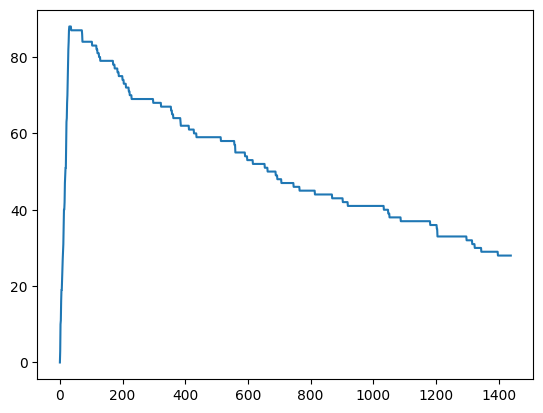

In [8]:
import matplotlib.pyplot as plt


l = server_2['on/off'].tolist()
Y = np.array(l).reshape(total_months*DAYS_MONTHS,P).sum(axis=0)
plt.plot(Y)
plt.show()

In [9]:
Y = np.array(server_2['on/off'].tolist()).reshape(total_months*DAYS_MONTHS,P)[:10,:]

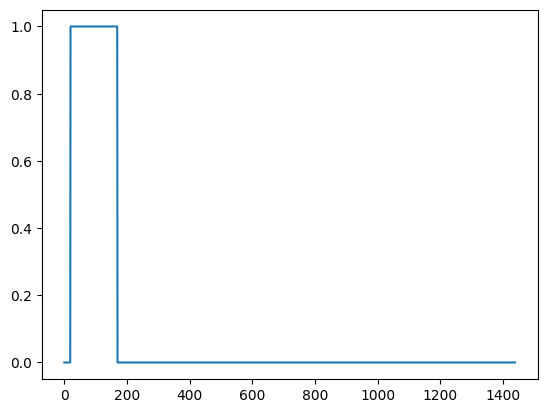

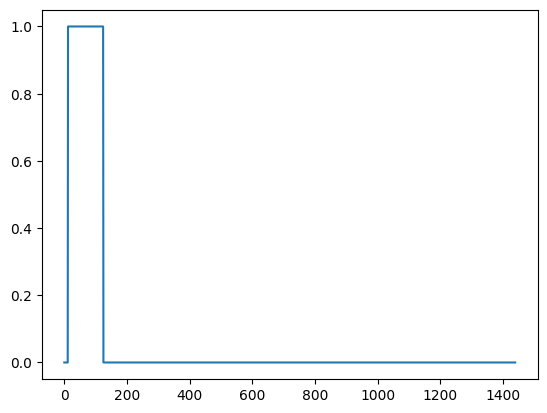

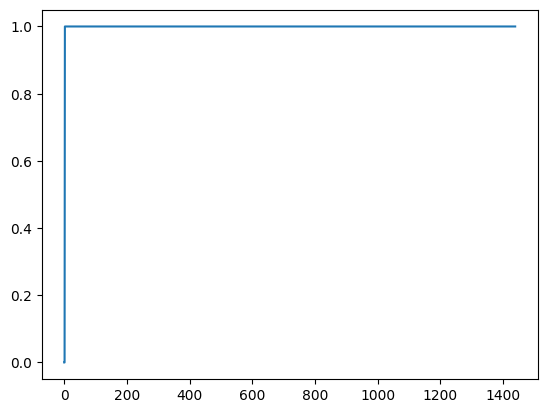

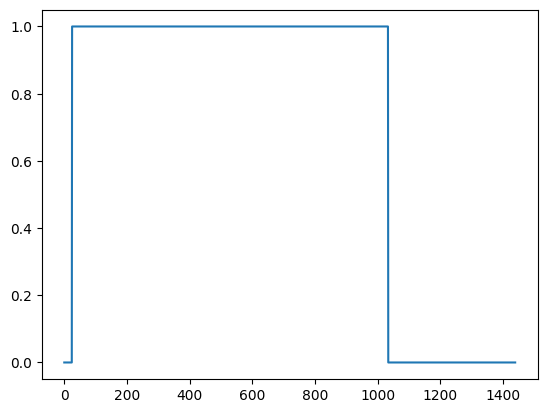

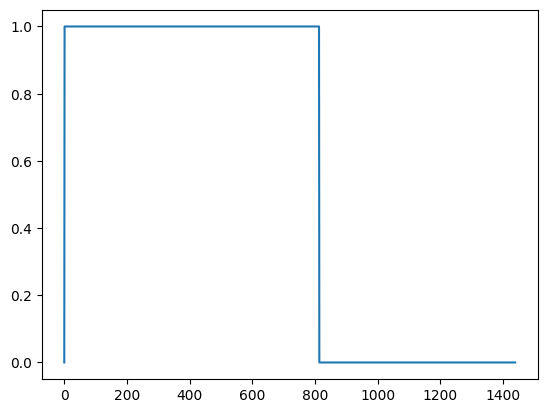

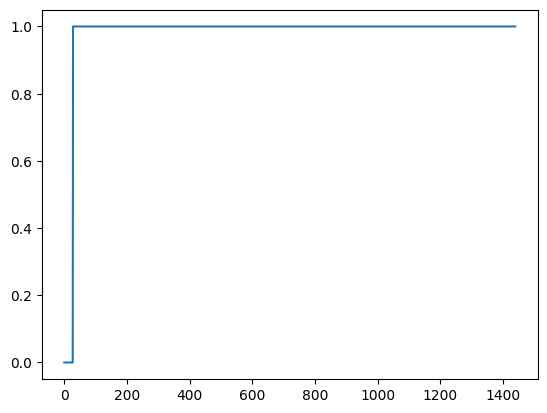

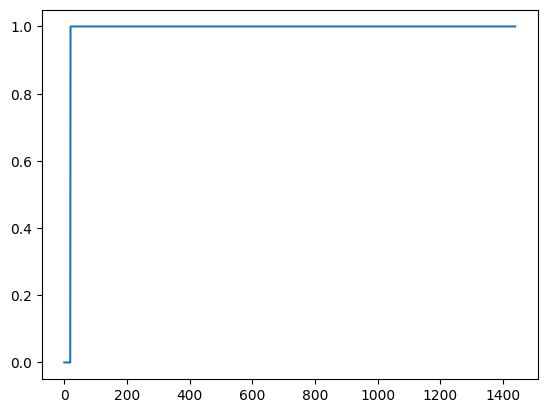

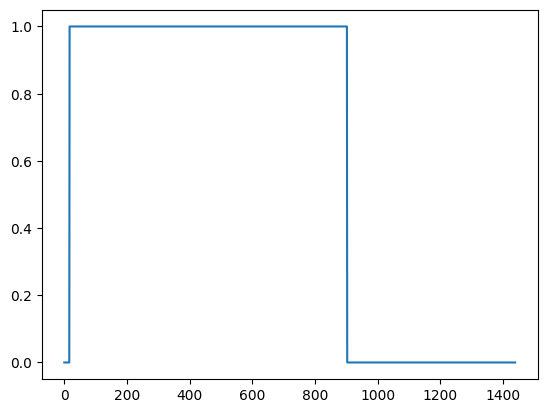

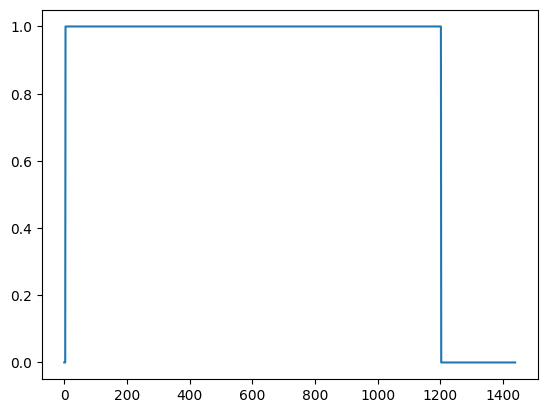

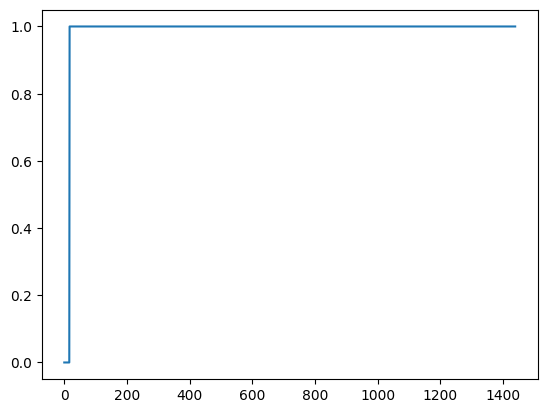

In [10]:
for i in range(10):
    plt.plot(Y[i,:])
    plt.show()

In [30]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [7]:
# print(T[:10])
print(Y[:10])
print(X[:10])
# print(X[2880])
t = 4
print(math.cos(t*2*math.pi/P))

[0 1 1 1 1 1 1 1 1 1]


NameError: name 'X' is not defined

In [41]:
X =  np.array([[C(t),S(t)] for t in T])

model = LogisticRegression(solver='liblinear', random_state=0)
print(X.shape)
model.fit(X,Y)
print(model.classes_)
print(model.intercept_)
print(model.coef_)

(1555200, 2)
[0 1]
[0.59874801]
[[0.11821458 0.93268436]]


In [12]:
logit = -0.23388324+ 0.31890748*0.99999048+ 0.92736226*0.00436331
prob = math.exp(logit)/(1+math.exp(logit))
print(prob)

0.5222521845917467


In [10]:
model.predict_proba(X)

array([[0.32716598, 0.67283402],
       [0.32627154, 0.67372846],
       [0.32537889, 0.67462111],
       ...,
       [0.32985986, 0.67014014],
       [0.32896016, 0.67103984],
       [0.32806219, 0.67193781]])

In [42]:
model.score(X, Y)

0.6453510802469136

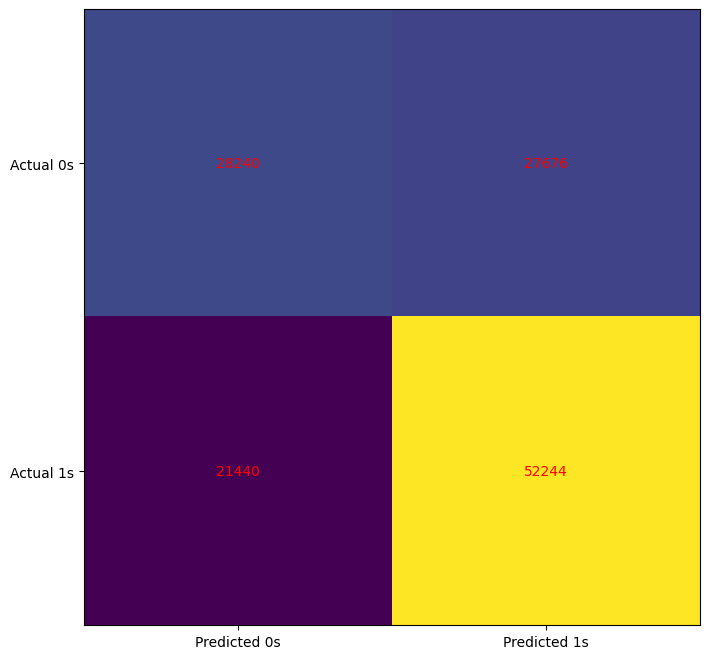

In [18]:
cm = confusion_matrix(Y, model.predict(X))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()


In [ ]:
csv_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
      # using the attribute information as the column names
col_names = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width','Class']
iris =  pd.read_csv(csv_url, names = col_names)

In [ ]:
display(iris)

In [46]:
print(Y[:1440])

[0 1 1 ... 1 1 1]


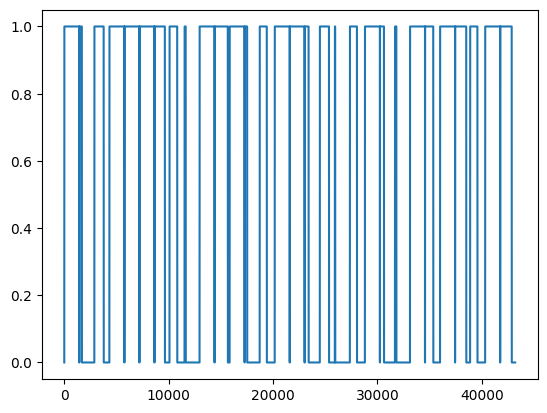

In [16]:
n = 30
P = 1440
plt.plot(range(P*n),Y[:P*n])
plt.show()

In [21]:
30*12*1440

518400

In [25]:
import random
lambda_param = 1/1440

w = 0.0
trials = 1000
for i in range(trials):
    working = math.ceil(random.expovariate(lambda_param))
    w += working
print(w/trials)

1441.863


In [45]:
server_2['on/off'].sum()/1555201

0.6319723302647053